<a href="https://colab.research.google.com/github/charlotteVDD/neuroForest/blob/main/Data_analysis_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import csv
import functools 
import scipy
import seaborn as sn
 

import os



Mounted at /content/drive


In [ ]:
from scipy.stats import mstats
df = pd.read_csv('/content/drive/My Drive/All_experiments_test_MIPT.csv')

window = 150
Begining_quantiles = mstats.mquantiles(df["Persistence time begining"])
End_quantiles = mstats.mquantiles(df["Persistence time end"])
print(f"Медианная длительность действий в первые {window}",
  f" сек. для выхода: {Begining_quantiles[1]}, квантили 25%:{Begining_quantiles[0]}",
  f", квантили 75%:{Begining_quantiles[2]}")
print(f"Медианная длительность действий в последние {window} сек.",
  f" для выхода: {End_quantiles[1]}, квантили 25%:{End_quantiles[0]}",
  f", квантили 75%:{End_quantiles[2]}")

Медианная длительность действий в первые 150  сек. для выхода: 117.81007122095275, квантили 25%:92.56355352314918 , квантили 75%:158.7108736628635
Медианная длительность действий в последние 150 сек.  для выхода: 124.49439856885066, квантили 25%:80.68173668091458 , квантили 75%:161.31576114615854


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 1 to 89
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ADHD score                      74 non-null     float64
 1   Convex envelope volume          74 non-null     float64
 2   Curvature                       72 non-null     float64
 3   Diameter                        74 non-null     float64
 4   Diffusion coefficient variance  73 non-null     float64
 5   Mean diffusion coefficient      73 non-null     float64
 6   Persistence time                74 non-null     float64
 7   Total distance                  74 non-null     float64
 8   Total gain                      74 non-null     float64
 9   Trajectory volatility           55 non-null     float64
 10  Variance with greedy strategy   38 non-null     float64
dtypes: float64(11)
memory usage: 6.9 KB
None
True


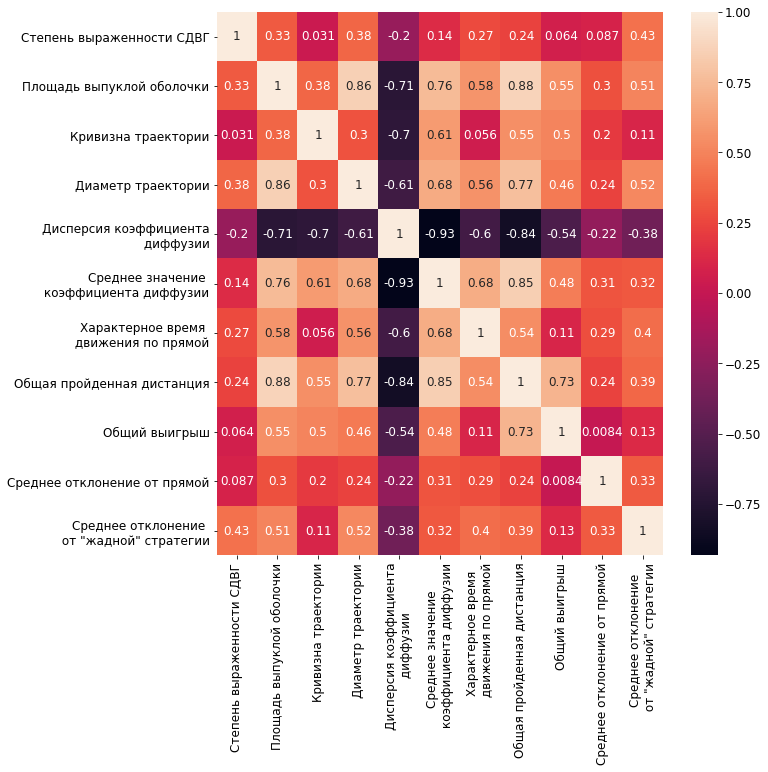

True


In [ ]:
#upload data
#gc = gspread.authorize(GoogleCredentials.get_application_default())

# Open our sheet and add some data.
#worksheet = gc.open('All_experiments_test').sheet1

df = pd.read_csv('/content/drive/My Drive/All_experiments_test.csv')

IndicesToDelete = []
for i in range(len(df['ADHD score'])):

  if 'SUPPRIMER' in df['Nickname'][i] or 'Supprime' in df['Nickname'][i] or (df['Time'][i] != 300 and df['Time'][i] != 3) or df['ADHD score'][i] == 0:
    IndicesToDelete.append(i)
  else:
    try:
      df['ADHD score'].iloc[i] = float( df['ADHD score'][i])
    except ValueError:
      df['ADHD score' ].iloc[i] = None

df = df.drop(index=IndicesToDelete)

df = df[df['ADHD score'].notna()]

df_corr = df.drop(columns=['Nickname','Time','ADHD label','Mean alpha (diffusion model)','Alpha std(diffusion model)'])

#df_corr = df.drop(columns=['Nickname','Time','ADHD label'])

print(df_corr.info())

for column in df_corr.columns:
  df[column] = np.array([str(v).replace(',', '.') for v in df[column].values], dtype=np.float64)
  df_corr[column] = np.array([str(v).replace(',', '.') for v in df_corr[column].values], dtype=np.float64)

#Russian version
df_corr = df_corr.rename(columns={'ADHD score': 'Степень выраженности СДВГ',
                        'Convex envelope volume': 'Площадь выпуклой оболочки',
                        'Curvature': 'Кривизна траектории',
                        'Diameter': 'Диаметр траектории',
                        'Diffusion coefficient variance': 'Дисперсия коэффициента\n диффузии',
                        'Mean diffusion coefficient': 'Среднее значение \n коэффициента диффузии',
                        'Persistence time': 'Характерное время \n движения по прямой',
                        'Total distance': 'Общая пройденная дистанция',
                        'Total gain': 'Общий выигрыш',
                        'Trajectory volatility': 'Среднее отклонение от прямой',
                        'Variance with greedy strategy': 'Среднее отклонение \n от "жадной" стратегии'})
#df_corr["Коэффициент вариации коэффициента диффузии"] = np.sqrt(df_corr['Дисперсия коэффициента\n диффузии'])/df_corr['Среднее значение \n коэффициента диффузии']
print(np.all(df_corr['Степень выраженности СДВГ'].notna()))
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12
        }

plt.rc('font', **font)

corrMatrix = df_corr.corr(method='spearman')
fig, ax = plt.subplots(figsize=(10,10)) 
sn.heatmap(corrMatrix, annot=True)
plt.show()
print(np.all(df_corr['Степень выраженности СДВГ'].notna()))

True


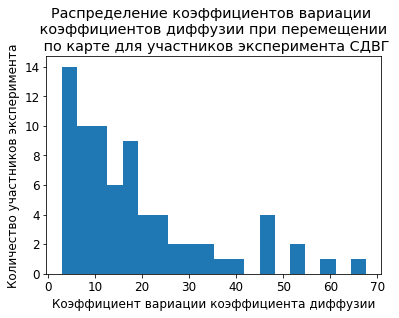

In [ ]:
plt.hist(df_corr["Коэффициент вариации коэффициента диффузии"], bins=20)
plt.title('Распределение коэффициентов вариации \n коэффициентов диффузии при перемещении \n по карте для участников эксперимента СДВГ')
plt.xlabel("Коэффициент вариации коэффициента диффузии")
plt.ylabel("Количество участников эксперимента")
print(np.all(df_corr['Степень выраженности СДВГ'].notna()))

In [ ]:
import scipy.stats  as stats
print(np.all(df_corr['Степень выраженности СДВГ'].notna()))
ADHD = df_corr['Степень выраженности СДВГ']
df["CV diffusion"] = np.sqrt(df['Diffusion coefficient variance'])/df['Mean diffusion coefficient']

for column in df.columns[1:]:
  print(column)
  ADHD = df['ADHD score']
  column_corr = df[column][df[column].notna()& df['ADHD score'].notna()]
  ADHD = df['ADHD score'][df[column].notna() & df['ADHD score'].notna()]
  print(stats.spearmanr(ADHD, column_corr))

True
Convex envelope volume
SpearmanrResult(correlation=0.3339160156011675, pvalue=0.003643303227810365)
Curvature
SpearmanrResult(correlation=0.03078135480953048, pvalue=0.797427291369401)
Diameter
SpearmanrResult(correlation=0.37601938639839777, pvalue=0.000961239503844264)
Diffusion coefficient variance
SpearmanrResult(correlation=-0.2022466749533797, pvalue=0.08617061115005846)
Mean diffusion coefficient
SpearmanrResult(correlation=0.1361735642377032, pvalue=0.2506604579678083)
Persistence time
SpearmanrResult(correlation=0.2746928054991723, pvalue=0.017859173562013903)
Total distance
SpearmanrResult(correlation=0.24048767753187525, pvalue=0.03902444340605234)
Total gain
SpearmanrResult(correlation=0.06447287530905736, pvalue=0.585242765914274)
Trajectory volatility
SpearmanrResult(correlation=0.0874821829653912, pvalue=0.525361375349231)
Variance with greedy strategy
SpearmanrResult(correlation=0.42517099926854085, pvalue=0.007791715766112331)
CV diffusion
SpearmanrResult(correlat

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[ 6.3712007  13.17412608 19.97705146]
(3, 2)


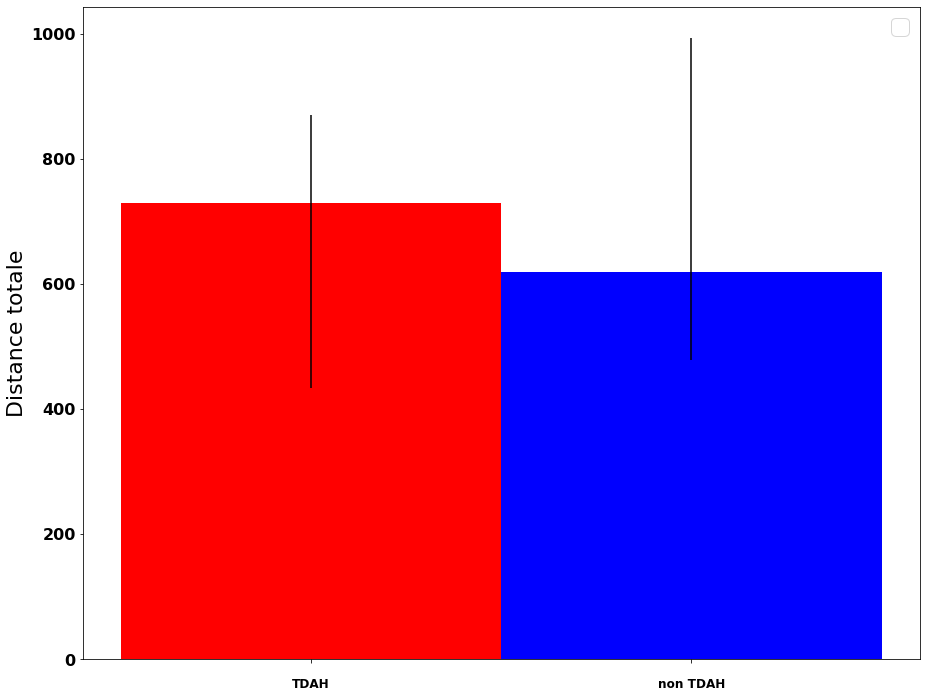

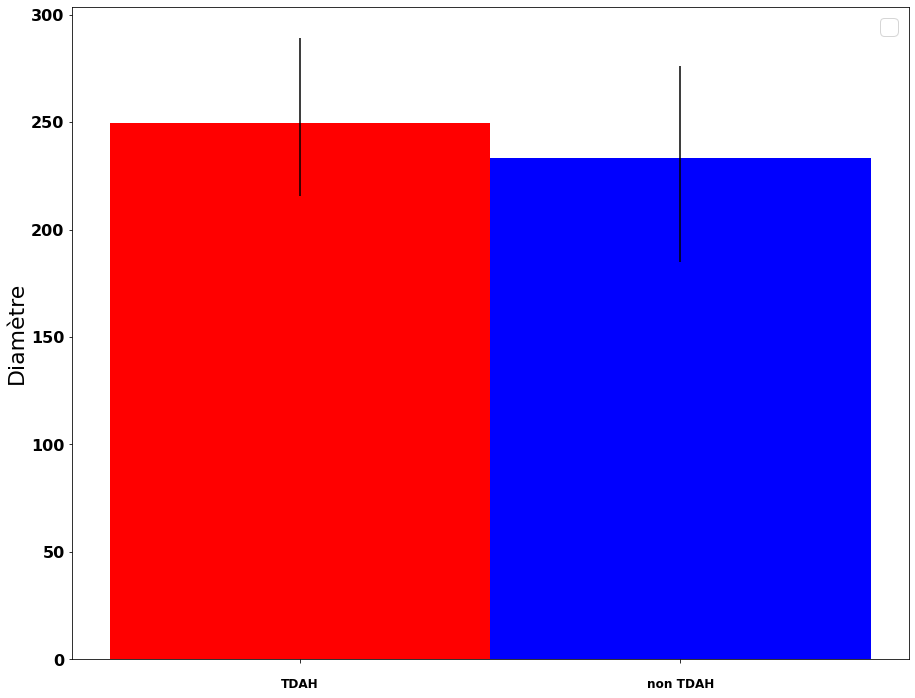

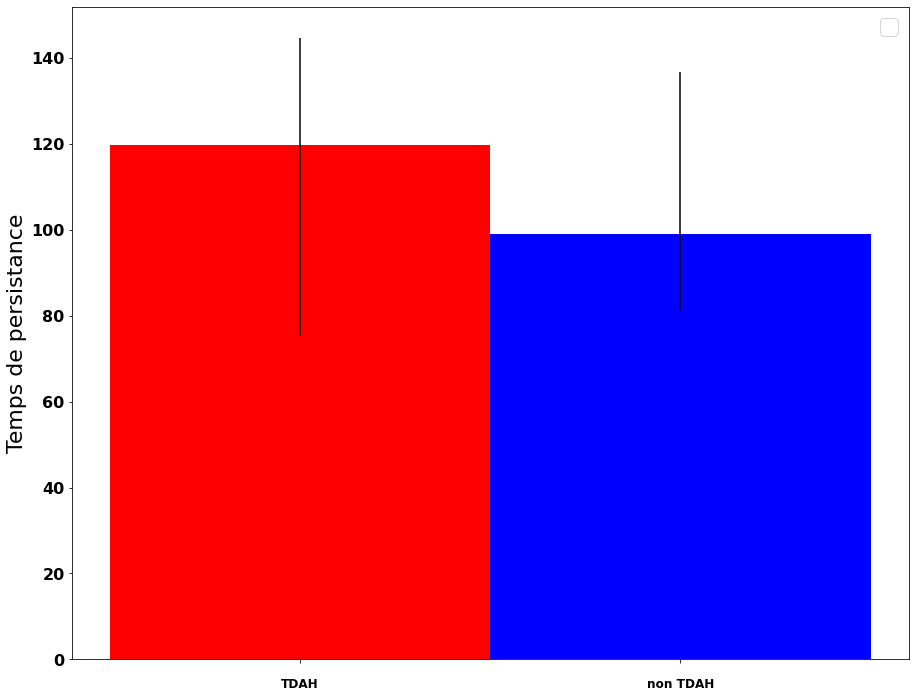

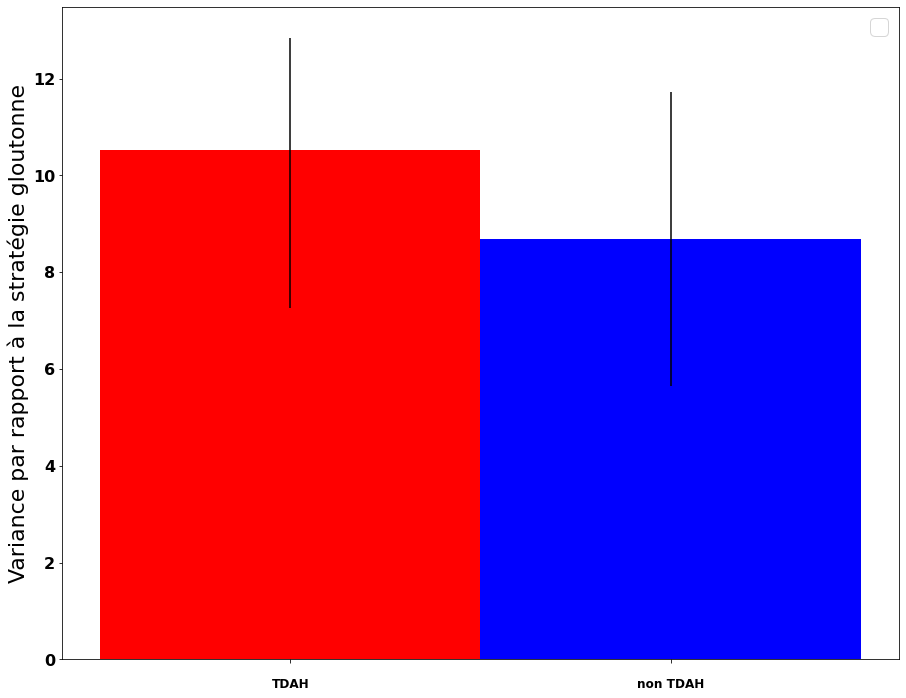

In [ ]:
from scipy.stats import mstats

TDAH_parameters = df.loc[(df['ADHD label'] == 1) & ((df['Nickname'] != 'NtyRgW')  & (df['Nickname'] != 'gUcsRM'))]
not_TDAH_parameters = df.loc[(df['ADHD label'] == 0) & ((df['Nickname'] != 'NtyRgW')  & (df['Nickname'] != 'gUcsRM')) ]
#real_TDAH_parameters = df.loc[(df['Nickname'] == 'NtyRgW')  | (df['Nickname'] == 'gUcsRM')]

columns_correlated = ['Total distance', 'Diameter','Persistence time']
columns_correlateD_Dim = ['relat.distance^3', 'relat.distance', 'sec']
labels = ['Distance totale', 'Diamètre','Temps de persistance']

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
i = 0
for column in columns_correlated:
  quantiles_TDAH = mstats.mquantiles(TDAH_parameters[column])
  quantiles_not_TDAH = mstats.mquantiles(not_TDAH_parameters[column])
  #quantiles_real_TDAH = mstats.mquantiles(real_TDAH_parameters[column])
  TDAH_errors = [quantiles_TDAH[1] - quantiles_TDAH[0], quantiles_TDAH[2] - quantiles_TDAH[1]]
  not_TDAH_errors = [quantiles_not_TDAH[1] - quantiles_not_TDAH[0], quantiles_not_TDAH[2] - quantiles_not_TDAH[1]]
  #real_TDAH_errors = [quantiles_real_TDAH[1] - quantiles_real_TDAH[0], quantiles_real_TDAH[2] - quantiles_real_TDAH[1]]

  x = 1
  width = 0.35  # the width of the bars
  fig, ax = plt.subplots(figsize=(15,12))
  #ax.bar([x - width,x, x + width], [quantiles_real_TDAH[1], quantiles_TDAH[1], quantiles_not_TDAH[1]], width, yerr=np.array([real_TDAH_errors, TDAH_errors, not_TDAH_errors]).T,color=['green', 'red', 'blue'] )
  ax.bar([x - width/2, x + width/2], [ quantiles_TDAH[1], quantiles_not_TDAH[1]], width, yerr=np.array([TDAH_errors, not_TDAH_errors]).T,color=['red', 'blue'] )
  
  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel(labels[i])
  ax.set_xticks([x - width/2, x + width/2])
  ax.set_xticklabels(['TDAH', 'non TDAH'])
  ax.legend()
  ax.tick_params(axis='x', which='major', pad=15)

  plt.rc('xtick', labelsize=12) 
  plt.rc('ytick', labelsize=16) 
  i += 1
#fig.tight_layout()

df = df[df['Variance with greedy strategy'].notna()]
TDAH_parameters = df.loc[(df['ADHD label'] == 1) & ((df['Nickname'] != 'NtyRgW')  & (df['Nickname'] != 'gUcsRM'))]
not_TDAH_parameters = df.loc[(df['ADHD label'] == 0) & ((df['Nickname'] != 'NtyRgW')  & (df['Nickname'] != 'gUcsRM')) ]
real_TDAH_parameters = df.loc[(df['Nickname'] == 'NtyRgW')  | (df['Nickname'] == 'gUcsRM')]

column = ['Variance with greedy strategy']
column_correlated_dim = [ 'relat.distance^2']
label = ['Variance par rapport à la stratégie gloutonne']

quantiles_TDAH = mstats.mquantiles(TDAH_parameters[column])
quantiles_not_TDAH = mstats.mquantiles(not_TDAH_parameters[column])
quantiles_real_TDAH = mstats.mquantiles(real_TDAH_parameters[column])
TDAH_errors = [quantiles_TDAH[1] - quantiles_TDAH[0], quantiles_TDAH[2] - quantiles_TDAH[1]]
not_TDAH_errors = [quantiles_not_TDAH[1] - quantiles_not_TDAH[0], quantiles_not_TDAH[2] - quantiles_not_TDAH[1]]
real_TDAH_errors = [quantiles_real_TDAH[1] - quantiles_real_TDAH[0], quantiles_real_TDAH[2] - quantiles_real_TDAH[1]]
print( quantiles_real_TDAH)
print(np.array([real_TDAH_errors, TDAH_errors, not_TDAH_errors]).shape)
x = 1
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(15,12))
ax.bar([x - width/2, x + width/2], [quantiles_TDAH[1], quantiles_not_TDAH[1]], width, yerr=np.array([ TDAH_errors, not_TDAH_errors]).T,color=['red', 'blue'] )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(label[0])
ax.set_xticks([x - width/2, x + width/2])
ax.set_xticklabels(['TDAH', 'non TDAH'])
ax.legend()
ax.tick_params(axis='x', which='major', pad=15)

plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=16) 

plt.show()

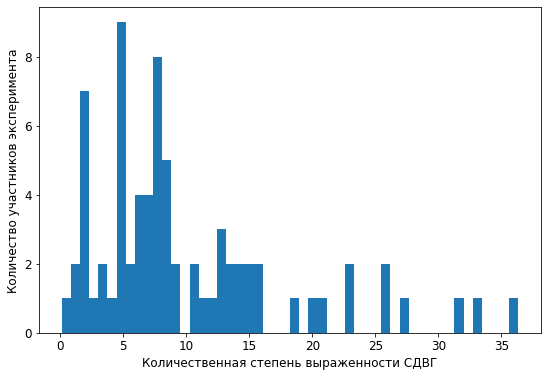

In [ ]:
fig, ax = plt.subplots(figsize=(9,6))
plt.hist(df['ADHD score'], bins = 50)
plt.xlabel("Количественная степень выраженности СДВГ")
plt.ylabel("Количество участников эксперимента")
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[ 6.3712007  13.17412608 19.97705146]
(3, 2)


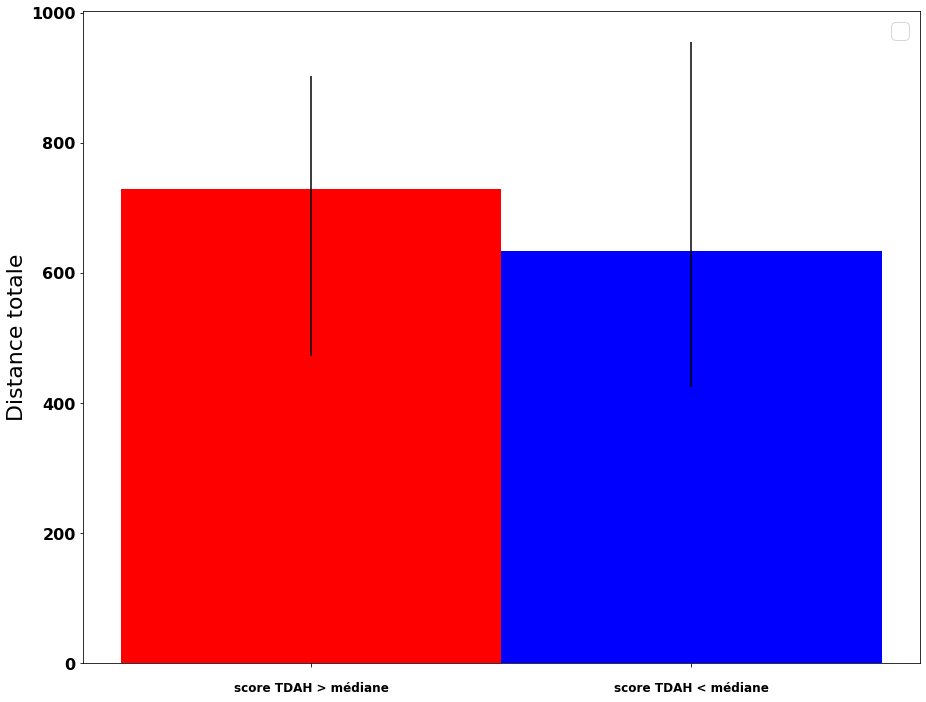

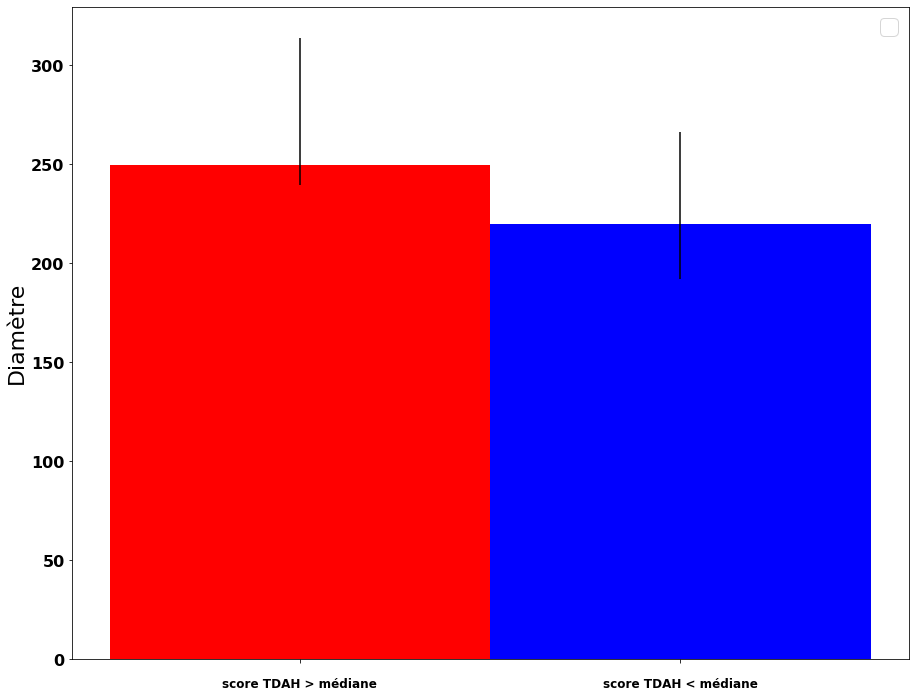

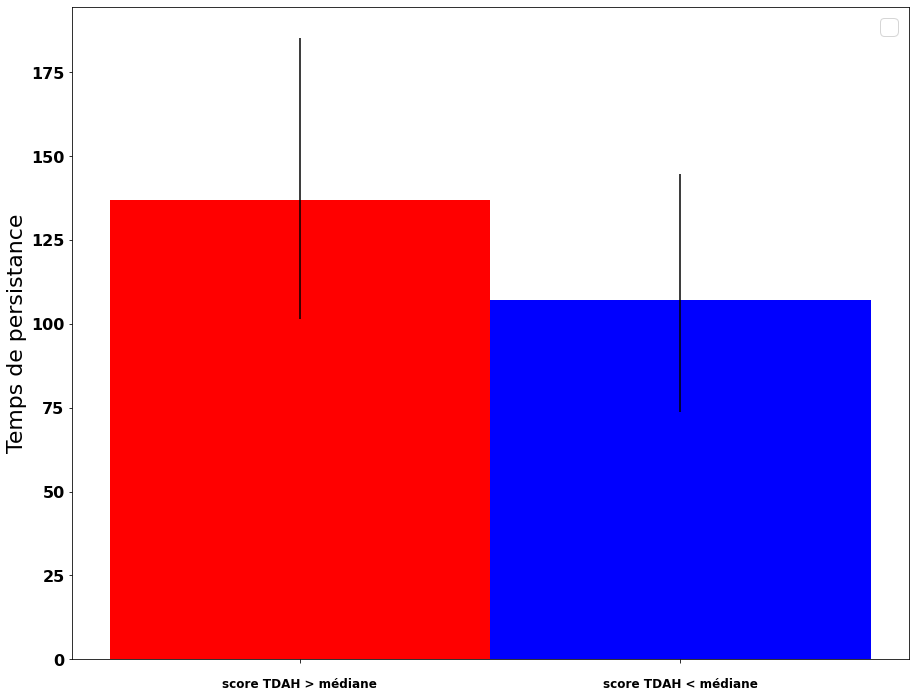

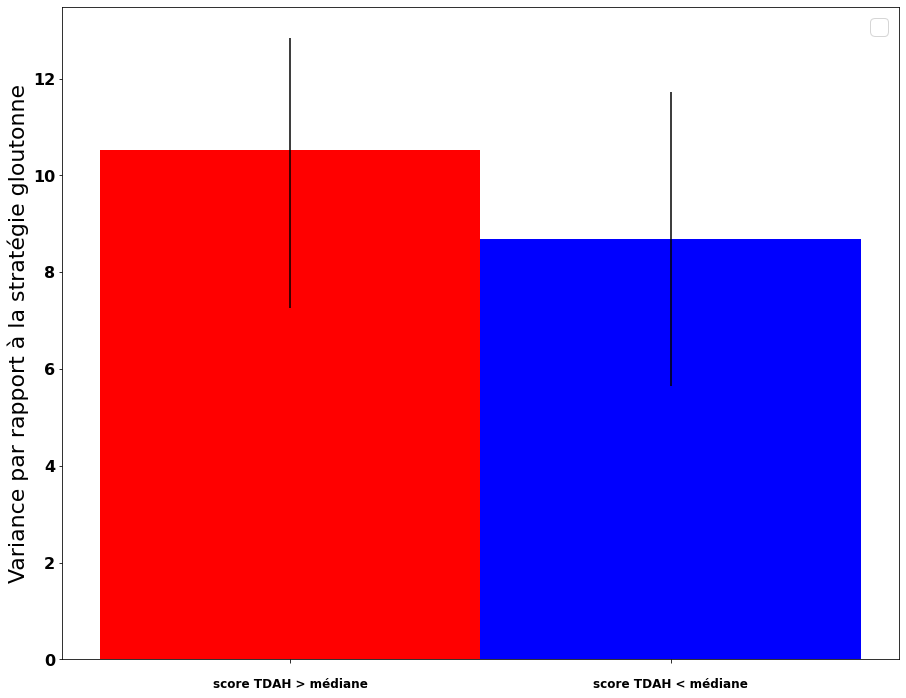

In [ ]:
from scipy.stats import mstats

TDAH_score_median = np.median(df['ADHD score'])
TDAH_parameters = df.loc[(df['ADHD score'] > TDAH_score_median) & ((df['Nickname'] != 'NtyRgW')  & (df['Nickname'] != 'gUcsRM'))]
not_TDAH_parameters = df.loc[(df['ADHD score'] < TDAH_score_median) & ((df['Nickname'] != 'NtyRgW')  & (df['Nickname'] != 'gUcsRM')) ]
real_TDAH_parameters = df.loc[(df['Nickname'] == 'NtyRgW')  | (df['Nickname'] == 'gUcsRM')]

columns_correlated = ['Total distance', 'Diameter','Persistence time']
columns_correlateD_Dim = ['relat.distance^3', 'relat.distance', 'sec']
labels = ['Distance totale', 'Diamètre','Temps de persistance']

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
i=0

for column in columns_correlated:
  quantiles_TDAH = mstats.mquantiles(TDAH_parameters[column])
  quantiles_not_TDAH = mstats.mquantiles(not_TDAH_parameters[column])
  #quantiles_real_TDAH = mstats.mquantiles(real_TDAH_parameters[column])
  TDAH_errors = [quantiles_TDAH[1] - quantiles_TDAH[0], quantiles_TDAH[2] - quantiles_TDAH[1]]
  not_TDAH_errors = [quantiles_not_TDAH[1] - quantiles_not_TDAH[0], quantiles_not_TDAH[2] - quantiles_not_TDAH[1]]
  #real_TDAH_errors = [quantiles_real_TDAH[1] - quantiles_real_TDAH[0], quantiles_real_TDAH[2] - quantiles_real_TDAH[1]]

  x = 1
  width = 0.35  # the width of the bars
  fig, ax = plt.subplots(figsize=(15,12))
  #ax.bar([x - width,x, x + width], [quantiles_real_TDAH[1], quantiles_TDAH[1], quantiles_not_TDAH[1]], width, yerr=np.array([real_TDAH_errors, TDAH_errors, not_TDAH_errors]).T,color=['green', 'red', 'blue'] )
  ax.bar([x - width/2, x + width/2], [ quantiles_TDAH[1], quantiles_not_TDAH[1]], width, yerr=np.array([TDAH_errors, not_TDAH_errors]).T,color=['red', 'blue'] )
  
  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel(labels[i])
  ax.set_xticks([x - width/2, x + width/2])
  ax.set_xticklabels(['score TDAH > médiane', 'score TDAH < médiane'])
  ax.legend()
  ax.tick_params(axis='x', which='major', pad=15)

  plt.rc('xtick', labelsize=12) 
  plt.rc('ytick', labelsize=16)
  i += 1 
#fig.tight_layout()

df = df[df['Variance with greedy strategy'].notna()]
TDAH_parameters = df.loc[(df['ADHD label'] == 1) & ((df['Nickname'] != 'NtyRgW')  & (df['Nickname'] != 'gUcsRM'))]
not_TDAH_parameters = df.loc[(df['ADHD label'] == 0) & ((df['Nickname'] != 'NtyRgW')  & (df['Nickname'] != 'gUcsRM')) ]
real_TDAH_parameters = df.loc[(df['Nickname'] == 'NtyRgW')  | (df['Nickname'] == 'gUcsRM')]

column = ['Variance with greedy strategy']
column_correlated_dim = [ 'relat.distance^2']
label = ['Variance par rapport à la stratégie gloutonne']

quantiles_TDAH = mstats.mquantiles(TDAH_parameters[column])
quantiles_not_TDAH = mstats.mquantiles(not_TDAH_parameters[column])
quantiles_real_TDAH = mstats.mquantiles(real_TDAH_parameters[column])
TDAH_errors = [quantiles_TDAH[1] - quantiles_TDAH[0], quantiles_TDAH[2] - quantiles_TDAH[1]]
not_TDAH_errors = [quantiles_not_TDAH[1] - quantiles_not_TDAH[0], quantiles_not_TDAH[2] - quantiles_not_TDAH[1]]
real_TDAH_errors = [quantiles_real_TDAH[1] - quantiles_real_TDAH[0], quantiles_real_TDAH[2] - quantiles_real_TDAH[1]]
print( quantiles_real_TDAH)
print(np.array([real_TDAH_errors, TDAH_errors, not_TDAH_errors]).shape)
x = 1
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(15,12))
ax.bar([x - width/2, x + width/2], [quantiles_TDAH[1], quantiles_not_TDAH[1]], width, yerr=np.array([ TDAH_errors, not_TDAH_errors]).T,color=['red', 'blue'] )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(label[0])
ax.set_xticks([x - width/2, x + width/2])
ax.set_xticklabels(['score TDAH > médiane', 'score TDAH < médiane'])
ax.legend()
ax.tick_params(axis='x', which='major', pad=15)

plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=16) 


plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


39    3074.276654
48     677.716761
Name: Convex envelope volume, dtype: float64
[ 677.7167607 1875.9967074 3074.2766541]
39    362.412121
48    150.019800
Name: Diameter, dtype: float64
[150.01979964 256.21596031 362.41212097]
39    130.537506
48    146.006052
Name: Persistence time, dtype: float64
[130.53750597 138.27177897 146.00605197]
39    130.537506
48    146.006052
Name: Persistence time, dtype: float64
[130.53750597 138.27177897 146.00605197]


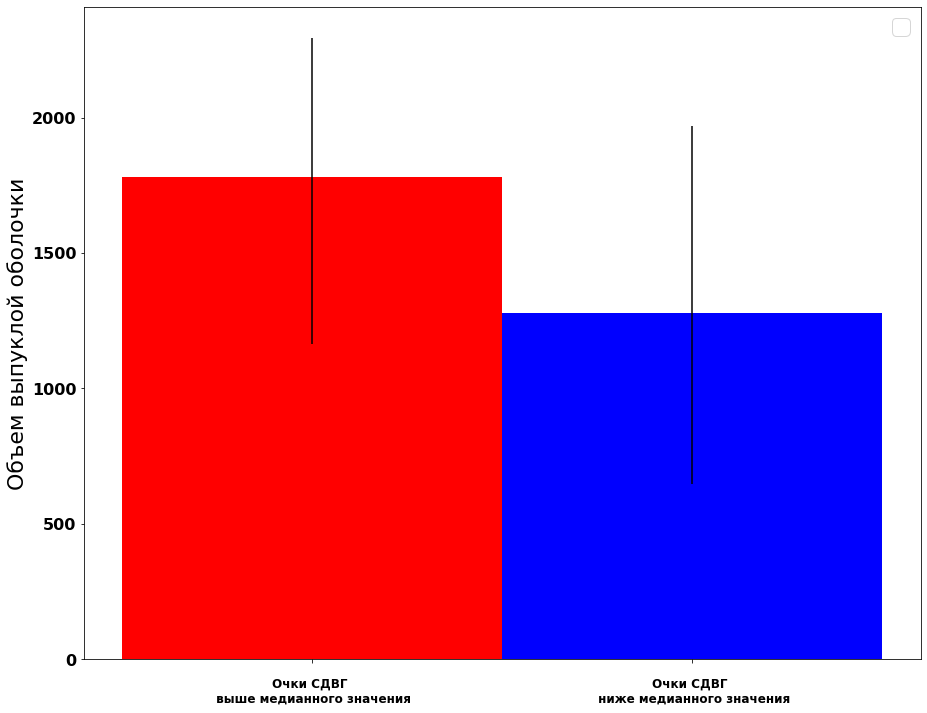

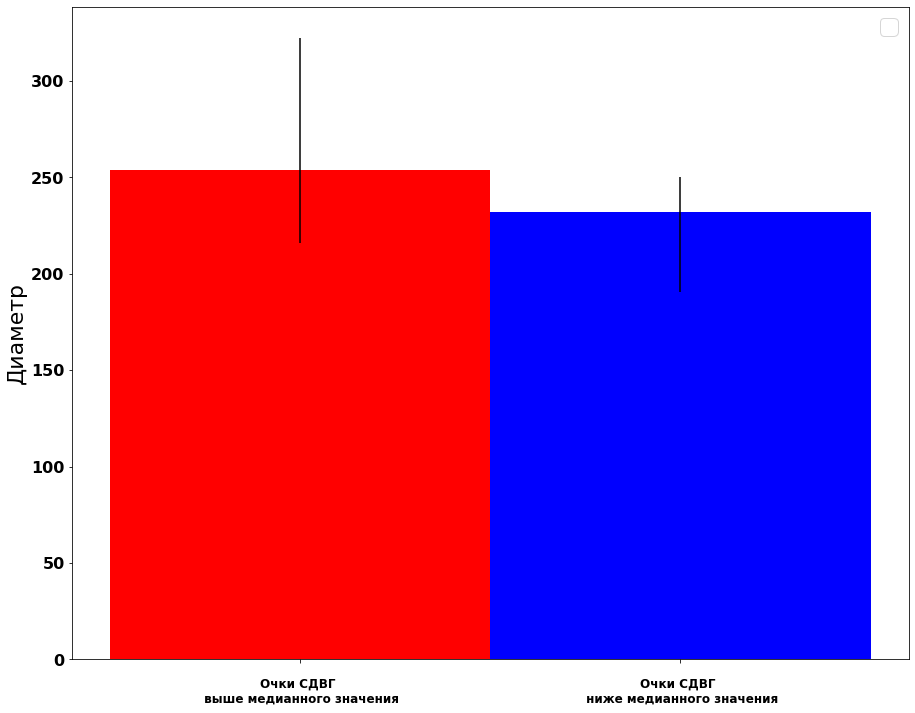

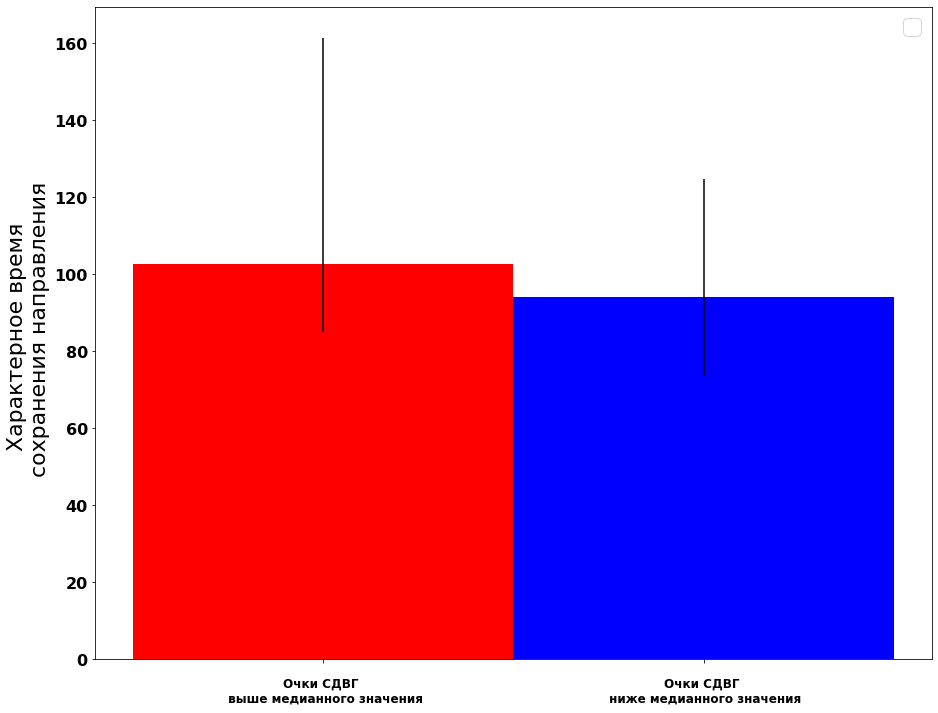

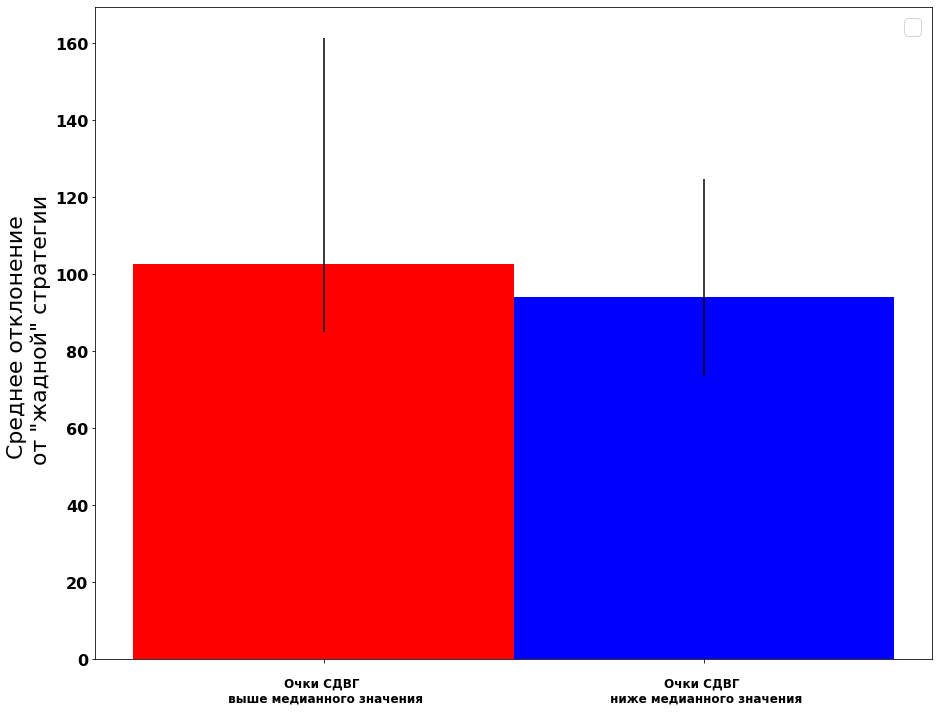

In [ ]:
from scipy.stats import mstats

TDAH_score_median = np.median(df['ADHD score'])
TDAH_parameters = df.loc[(df['ADHD score'] > TDAH_score_median) & ((df['Nickname'] != 'NtyRgW')  & (df['Nickname'] != 'gUcsRM'))]
not_TDAH_parameters = df.loc[(df['ADHD score'] < TDAH_score_median) & ((df['Nickname'] != 'NtyRgW')  & (df['Nickname'] != 'gUcsRM')) ]
real_TDAH_parameters = df.loc[(df['Nickname'] == 'NtyRgW')  | (df['Nickname'] == 'gUcsRM')]

columns_correlated = ['Convex envelope volume', 'Diameter','Persistence time']
columns_correlated_dim = ['relat.distance^3', 'relat.distance', 'sec']
labels = ['Объем выпуклой оболочки', 'Диаметр','Характерное время \n сохранения направления']
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
i=0
for column in columns_correlated:
  quantiles_TDAH = mstats.mquantiles(TDAH_parameters[column])
  quantiles_not_TDAH = mstats.mquantiles(not_TDAH_parameters[column])
  quantiles_real_TDAH = mstats.mquantiles(real_TDAH_parameters[column])
  print(real_TDAH_parameters[column])
  print(quantiles_real_TDAH)
  TDAH_errors = [quantiles_TDAH[1] - quantiles_TDAH[0], quantiles_TDAH[2] - quantiles_TDAH[1]]
  not_TDAH_errors = [quantiles_not_TDAH[1] - quantiles_not_TDAH[0], quantiles_not_TDAH[2] - quantiles_not_TDAH[1]]
  real_TDAH_errors = [quantiles_real_TDAH[1] - quantiles_real_TDAH[0], quantiles_real_TDAH[2] - quantiles_real_TDAH[1]]

  x = 1
  width = 0.35  # the width of the bars
  fig, ax = plt.subplots(figsize=(15,12))
  ax.bar([x - width/2, x + width/2], [ quantiles_TDAH[1], quantiles_not_TDAH[1]], width, yerr=np.array([TDAH_errors, not_TDAH_errors]).T,color=['red', 'blue'] )
  
  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel(labels[i])
  ax.set_xticks([x - width/2, x + width/2])
  ax.set_xticklabels(['Очки СДВГ \n выше медианного значения', 'Очки СДВГ \n ниже медианного значения'])
  ax.legend()
  ax.tick_params(axis='x', which='major', pad=15)

  plt.rc('xtick', labelsize=12) 
  plt.rc('ytick', labelsize=16) 
  i+=1
#fig.tight_layout()

quantiles_TDAH = mstats.mquantiles(TDAH_parameters[column])
quantiles_not_TDAH = mstats.mquantiles(not_TDAH_parameters[column])
quantiles_real_TDAH = mstats.mquantiles(real_TDAH_parameters[column])
print(real_TDAH_parameters[column])
print(quantiles_real_TDAH)
TDAH_errors = [quantiles_TDAH[1] - quantiles_TDAH[0], quantiles_TDAH[2] - quantiles_TDAH[1]]
not_TDAH_errors = [quantiles_not_TDAH[1] - quantiles_not_TDAH[0], quantiles_not_TDAH[2] - quantiles_not_TDAH[1]]
real_TDAH_errors = [quantiles_real_TDAH[1] - quantiles_real_TDAH[0], quantiles_real_TDAH[2] - quantiles_real_TDAH[1]]

x = 1
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(15,12))
ax.bar([x - width/2, x + width/2], [ quantiles_TDAH[1], quantiles_not_TDAH[1]], width, yerr=np.array([TDAH_errors, not_TDAH_errors]).T,color=['red', 'blue'] )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Среднее отклонение \n от "жадной" стратегии')
ax.set_xticks([x - width/2, x + width/2])
ax.set_xticklabels(['Очки СДВГ \n выше медианного значения', 'Очки СДВГ \n ниже медианного значения'])
ax.legend()
ax.tick_params(axis='x', which='major', pad=15)

plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=16)  

plt.show()

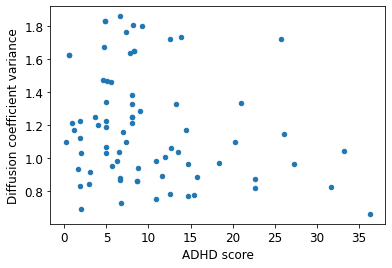

In [ ]:
df.plot('ADHD score', 'Diffusion coefficient variance', 'scatter')

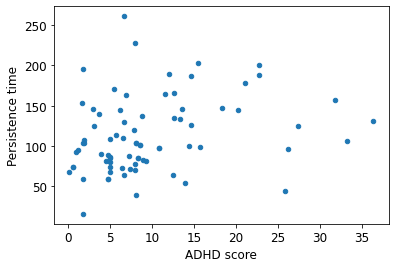

In [ ]:
df.plot('ADHD score', 'Persistence time', 'scatter')

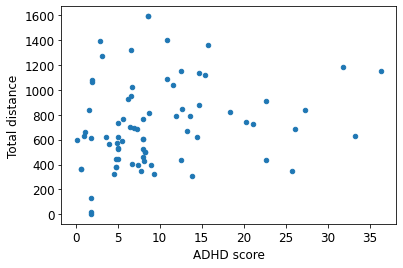

In [ ]:
df.plot('ADHD score', 'Total distance', 'scatter')

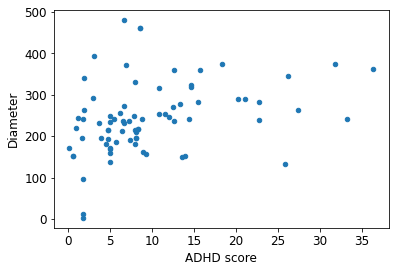

In [ ]:
df.plot('ADHD score', 'Diameter', 'scatter')

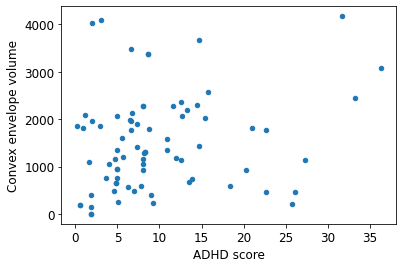

In [ ]:
df.plot('ADHD score', 'Convex envelope volume', 'scatter')

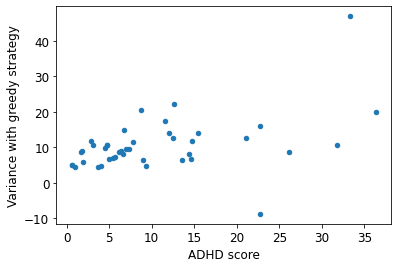

In [ ]:
df.plot('ADHD score', 'Variance with greedy strategy', 'scatter')

###PCA 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_PCA = df.drop(columns=['Nickname','Time','ADHD label','Mean alpha (diffusion model)','Alpha std(diffusion model)'])

features = ['Convex envelope volume', 'Curvature', 'Diameter',
       'Diffusion coefficient variance', 'Mean diffusion coefficient',
       'Persistence time', 'Total distance', 'Total gain',
       'Trajectory volatility', 'Variance with greedy strategy']
for column in df_PCA.columns:
  df_PCA = df_PCA [df_PCA[column].notna()]

df_PCA_features = df_PCA.loc[:, features].values
df_PCA_features = StandardScaler().fit_transform(df_PCA_features) # normalizing the features

pca_ADHD = PCA(n_components=4)
principalComponents_ADHD = pca_ADHD.fit_transform(df_PCA_features)


principal_ADHD_Df = pd.DataFrame(data = principalComponents_ADHD)

print('Explained variation per principal component: {}'.format(pca_ADHD.explained_variance_ratio_))
print('Sum of explained variation: {}'.format(np.sum(pca_ADHD.explained_variance_ratio_)))

Explained variation per principal component: [0.53557239 0.13945403 0.10811901 0.08677578]
Sum of explained variation: 0.8699212084661236


(We can add a 5th component to obtain the sum of explained variation = $0.92$)



### Multiple regression

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

X = principal_ADHD_Df
target = df_PCA['ADHD score']

regr.fit(X, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Coefficient
print(regr.coef_)

[ 1.08337743  1.76711167  2.84803869 -0.37401496]


In [ ]:
#Precision
print(regr.score(X, target))

0.37042927903704104


### Drop Variance with greedy strategy

###PCA 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_PCA = df.drop(columns=['Nickname','Time','ADHD label','Mean alpha (diffusion model)','Alpha std(diffusion model)', 'Variance with greedy strategy'])

features = ['Convex envelope volume', 'Curvature', 'Diameter',
       'Diffusion coefficient variance', 'Mean diffusion coefficient',
       'Persistence time', 'Total distance', 'Total gain',
       'Trajectory volatility']
for column in df_PCA.columns:
  df_PCA = df_PCA [df_PCA[column].notna()]

df_PCA_features = df_PCA.loc[:, features].values
df_PCA_features = StandardScaler().fit_transform(df_PCA_features) # normalizing the features

pca_ADHD = PCA(n_components=4)
principalComponents_ADHD = pca_ADHD.fit_transform(df_PCA_features)

principal_ADHD_Df = pd.DataFrame(data = principalComponents_ADHD)

print('Explained variation per principal component: {}'.format(pca_ADHD.explained_variance_ratio_))
print('Sum of explained variation: {}'.format(np.sum(pca_ADHD.explained_variance_ratio_)))

Explained variation per principal component: [0.55532716 0.13464918 0.10324126 0.09012042]
Sum of explained variation: 0.883338011738302


### Multiple regression

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

X = principal_ADHD_Df
target = df_PCA['ADHD score']
print(len(target))
regr.fit(X, target)

60


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Coefficient
print(regr.coef_)

[ 0.62916052 -0.05670252  1.61406047 -2.95391601]


In [ ]:
#Precision
print(regr.score(X, target))

0.30620849768723624
